# Visualizations

Here we take an initial look at the data collected so far and answer these 3 questions
1. Produce a histogram showing the number of fires occurring every 50 mile distance from your assigned city up to the max specified distance.
2. Produce a time series graph of total acres burned per year for the fires occurring in the specified distance from your city.
3. Produce a time series graph containing your fire smoke estimate for your city and the AQI estimate for your city.


In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
with open('../data/Grand_Junction_Wildfire_Features_geometry_dropped.json') as f:
    my_features = json.load(f)

In [3]:
#Checking if the features have loaded properly
len(my_features)

94768

## Question 1:

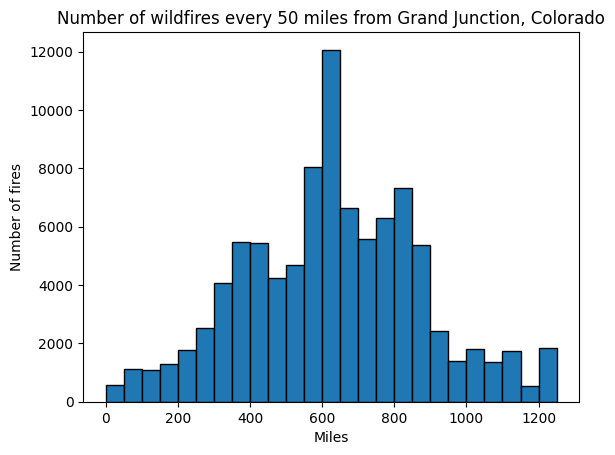

In [90]:
distances = []
for fire in my_features:
    distances.append(fire['attributes']['distance_from_city'])
    
bins = np.linspace(0, 1250, ((1250) // 50)+1)

#Create plot
plt.hist(distances, bins, edgecolor='black')
plt.xlabel("Miles")
plt.ylabel("Number of fires")
plt.title("Number of wildfires every 50 miles from Grand Junction, Colorado")

# Save the plot as a PNG image
plt.savefig('Question1.png')

## Question 2:

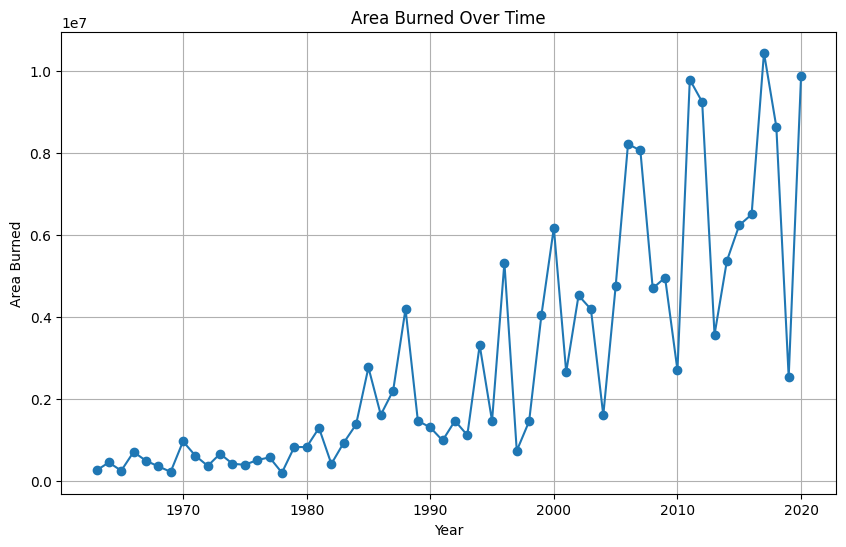

In [95]:
area_burned = {}
for fire in my_features:
    year = fire['attributes']['Fire_Year']
    area = fire['attributes']['GIS_Acres']
    if year in area_burned:
        area_burned[year]+=area
    else:
        area_burned[year]=area
# Extract years and corresponding values
years = list(area_burned.keys())
values = list(area_burned.values())

# Create a time series plot
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-')
plt.title('Area Burned Over Time')
plt.xlabel('Year')
plt.ylabel('Area Burned')
plt.grid(True)

# Show the plot
#plt.show()

# Save the plot as a PNG image
plt.savefig('Question2.png')

## Question 3

In [96]:
average_top_5_aqi = pd.read_csv('../data/average_top_5_aqi.csv')
average_smoke_area_distance_estimate = pd.read_csv('../data/average_smoke_area_distance_estimate.csv')

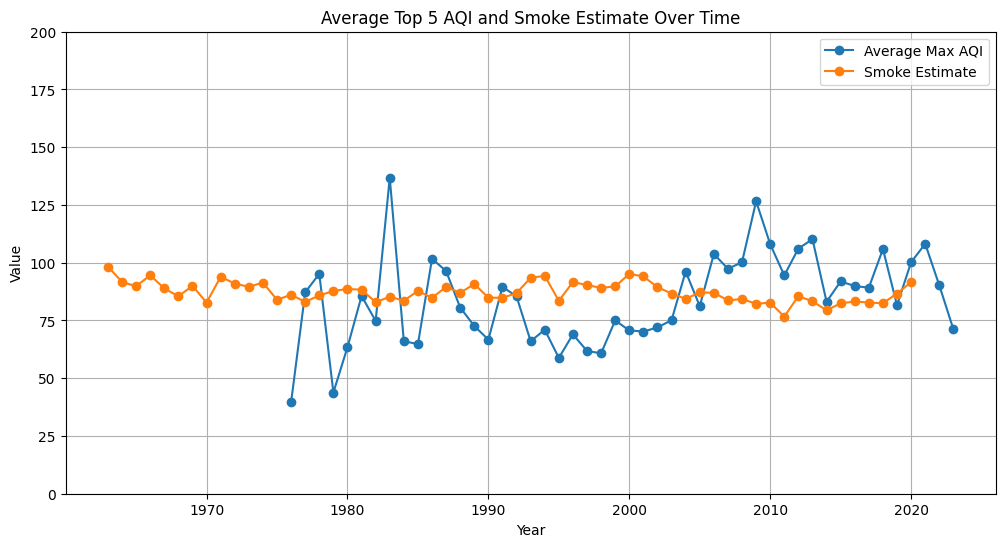

In [97]:
# Convert 'Year' column to datetime format with a year-only format
average_top_5_aqi['Year'] = pd.to_datetime(average_top_5_aqi['Year'], format='%Y')

average_smoke_area_distance_estimate['Year'] = pd.to_datetime(average_smoke_area_distance_estimate['Year'], format='%Y')

# Set 'Year' as the index
average_top_5_aqi.set_index('Year', inplace=True)

# Set 'Year' as the index for the second DataFrame
average_smoke_area_distance_estimate.set_index('Year', inplace=True)

# Create a figure for both plots
plt.figure(figsize=(12, 6))

# Plot the first graph
plt.plot(average_top_5_aqi.index, average_top_5_aqi['Max AQI'], marker='o', linestyle='-', label='Average Max AQI')

# Plot the second graph on the same plot
plt.plot(average_smoke_area_distance_estimate.index, average_smoke_area_distance_estimate['Smoke Estimate'], marker='o', linestyle='-', label='Smoke Estimate')

# Set titles and labels
plt.title('Average Top 5 AQI and Smoke Estimate Over Time')
plt.xlabel('Year')
plt.ylabel('Value')

# Display legend
plt.legend()
plt.ylim(0, 200)

# Display the plot
plt.grid(True)
# plt.show()

# Save the plot as a PNG image
plt.savefig('Question3.png')